In [31]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

# Questão 1

Lendo a tabela:

In [12]:
df = pd.read_csv('prod_table.csv', sep = ',')
df_treated = pd.DataFrame(df.iloc[:,0:3])
to_app = df.iloc[:,3:6]
to_app.columns = ['Produção', 'Temperatura', 'Concentração']
df_treated = pd.concat([df_treated, to_app], ignore_index = True)
df_treated.head()

,Produção,Temperatura,Concentração
0,189,80,10
1,203,100,10
2,222,120,10
3,234,140,10
4,261,160,10


a) Ajustando um modelo de regressão para a produção (Y) em função da temperatura ($x_1$) e concentração ($x_2$).

In [15]:
results = smf.ols('Produção ~ Temperatura + Concentração', data=df_treated).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Produção   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           8.23e-13
Time:                        19:41:49   Log-Likelihood:                -62.739
No. Observations:                  20   AIC:                             131.5
Df Residuals:                      17   BIC:                             134.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       93.1800      7.254     12.845      0.000      77.875     108.485
Temperatura      0.8700      0.048     18.204      0.000       0.769       0.971
Concentração     2.4240      0.242     10.025      0.000       1.914       2.934
==============================================================================
Omnibus:                        0.340   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.497
Skew:                          -0.170   Prob(JB):                        0.780
Kurtosis:                       2.307   Cond. No.                         668.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O modelo obtido é definido como:
    
$$
Y_{i} = 93.1800 + 0.87x_1 + 2.424x_2
$$

Como os coeficientes são positivos, eles demonstram que a temperatura e a concentração são positivamente correlacionados com a produção. Além disso, o valor desses coeficientes nos dão a taxa com que a produção aumenta de acordo com a covariável. Por exemplo: ao aumentar em 1 grau a temperatura, a produção aumenta em 0.87.

b) Verificando suposições do modelo.

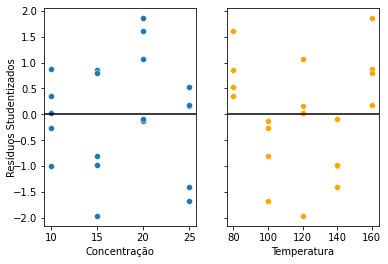

In [70]:
def student_residuals(results, df_treated):
    x = df_treated[['Temperatura', 'Concentração']].to_numpy()
    errors = df_treated['Produção'].to_numpy() - results.predict()
    hat = np.dot(np.dot(x,np.linalg.inv(np.dot(x.T, x))),x.T)
    hat_diag = hat.diagonal()
    student = []
    for i in range(0,len(hat_diag)):
        e = errors[i]/np.sqrt(errors.var(ddof = 1)*(1-hat_diag[i]))
        student.append(e)
    
    
    fig, axs = plt.subplots(ncols=2, sharey = True)
    fig.text(0.04, 0.5, 'Resíduos Studentizados', va='center', rotation='vertical')
    a = sns.scatterplot(x = df_treated['Concentração'], y = student, ax = axs[0])
    b = sns.scatterplot(x = df_treated['Temperatura'], y = student, ax = axs[1], color = 'orange')
    a.axhline(0, color = 'black')
    b.axhline(0, color = 'black')


    

student_residuals(results, df_treated)


Como os resíduos parecem estar uniformemente distribuídos ao redor do 0 para ambas as covariáveis e a sua variação parece constante, o modelo adquirido parece satisfazer as suposições